In [1]:
import math
from numpy import genfromtxt
import scipy
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
from scipy.optimize import Bounds
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rc('font',family ='Arial',size=7)
import pandas as pd
import numpy as np
from scipy.stats import kstest
from scipy.stats import ks_2samp
import random
import seaborn as sns

In [2]:
## Read data from 

CTRLd = pd.read_csv('CTRL_OJ-Distribution-1.csv')
XRTd = pd.read_csv('XRT_OJ-Distribution-1.csv')
XRTTEd = pd.read_csv('XRTTE_OJ-Distribution-1.csv')


In [3]:

CTRLSlice11=[]
XRTSlice11=[]
XRTTESlice11=[]

for i in range(0, len(CTRLd.Slice1)):
    CTRLSlice11.append(CTRLd.Slice1[i]/sum(CTRLd.Slice1))
    
for i in range(0, len(XRTd.Slice1)):
    XRTSlice11.append(XRTd.Slice1[i]/sum(CTRLd.Slice1))
    
for i in range(0, len(XRTTEd.Slice1)):
    XRTTESlice11.append(XRTTEd.Slice1[i]/sum(CTRLd.Slice1))

In [4]:
##Read data from files from Orientation distribution (OrientationJ, imageJ)

listAll=os.listdir('Orient_wPenny')
a=0
for i in range(len(listAll)):
    # print(listAll[i][-1])
    if listAll[i][-1]=='e':
        # print(i)
        a=i
listAll.pop(a)

print(listAll)

Direct3C={}
Direct3XC={}
Direct3XTP={}
Direct3TP={}

lol={'orient': [], 'slice': [], 'slicenorm': []}

['CTRL', 'TE', 'XR', 'XRTE']


In [5]:
c1=0
c2=0
c3=0
c4=0

for i in listAll:
    # print(i)
    patheach='/Users/lnunezal/Library/CloudStorage/OneDrive-purdue.edu/tepoleLab/images/Orient_wPenny/'+i
    # print(patheach[-1])
    if os.path.isdir(patheach) == True:
        for j in os.listdir(patheach):
            if j[-1]!='e':
                # print(j)
                specimenFilee=pd.read_csv(patheach+'/'+j)
                specimenFile = specimenFilee.to_numpy()[:,0:]
                orient=specimenFile[:,0]
                slice1=specimenFile[:,1]
                slice1norm=np.zeros((len(slice1)))
                for k in range(0, len(slice1)):
                    slice1norm[k]=slice1[k]/sum(slice1)
                linee={'orient': orient, 'slice': slice1, 'slicenorm': slice1norm}
                if i == 'CTRL':
                    Direct3C[c1]=linee
                    c1+=1
                elif i == 'TE':
                    Direct3TP[c2]=linee
                    c2+=1
                elif i == 'XR':
                    Direct3XC[c3]=linee
                    c3+=1
                elif i == 'XRTE':
                    Direct3XTP[c4]=linee
                    c4+=1


In [6]:
OrientProm3C=np.zeros((len(XRTTEd.Orientation)))
OrientProm3XC=np.zeros((len(XRTTEd.Orientation)))
OrientProm3XTP=np.zeros((len(XRTTEd.Orientation)))
OrientProm3TP=np.zeros((len(XRTTEd.Orientation)))


for i in range(180):
    for j in range(len(Direct3C)):
        # sum3C+=Direct3C[j]['slice'][i]
        OrientProm3C[i]+=(1/len(Direct3C))*(Direct3C[j]['slice'][i])
    for k in range(len(Direct3XC)):
        OrientProm3XC[i]+=(1/len(Direct3XC))*(Direct3XC[k]['slice'][i])
    for l in range(len(Direct3XTP)):
        OrientProm3XTP[i]+=(1/len(Direct3XTP))*(Direct3XTP[l]['slice'][i])
    for m in range(len(Direct3TP)):
        OrientProm3TP[i]+=(1/len(Direct3TP))*(Direct3TP[m]['slice'][i])

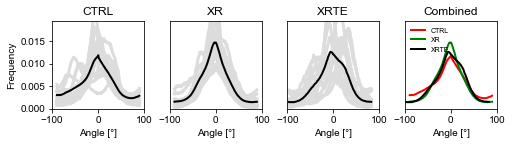

In [7]:
## Plot all histograms of the same group

fig,ax = plt.subplots(1,4,figsize = (7, 1.9), 
                      constrained_layout=True
                     )

# for i in range(len(Direct3C[0]['slice'])+len(Direct3XC[0]['slice'])+len(Direct3TP[0]['slice'])+len(Direct3XTP[0]['slice'])):
for i in range(16):

    if i < len(Direct3C):
        ax[0].plot(Direct3C[i]['orient'],(1/np.sum(Direct3C[i]['slice']))*Direct3C[i]['slice'], color='gainsboro', linewidth=3)
        ax[0].set_title("CTRL", fontsize=12)
        ax[0].set_ylabel("Frequency",fontsize=10)
        ax[0].set_xlabel("Angle [°]", fontsize=10)

    if i < len(Direct3XC):
        ax[1].plot(Direct3XC[i]['orient'],(1/np.sum(Direct3XC[i]['slice']))*Direct3XC[i]['slice'], color='gainsboro', linewidth=3)
        ax[1].set_title("XR", fontsize=12)
        #ax[1].set_ylabel("W")
        ax[1].set_xlabel("Angle [°]", fontsize=10)

    if i < len(Direct3XTP):
        # print(np.sum(Direct3C[i]['orient']))
        ax[2].plot(Direct3XTP[i]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])),(1/np.sum(Direct3XTP[i]['slice']))*Direct3XTP[i]['slice'], color='gainsboro', linewidth=3)
        ax[2].set_title("XRTE", fontsize=12)
        #ax[2].set_ylabel("W")
        ax[2].set_xlabel("Angle [°]", fontsize=10)

# print(Direct3C[2]['orient'])
ax[0].plot(Direct3C[0]['orient'], (1/np.sum(OrientProm3C))*OrientProm3C,color='0',linewidth=2)
ax[1].plot(Direct3XC[0]['orient'], (1/np.sum(OrientProm3XC))*OrientProm3XC,color='0',linewidth=2)
ax[2].plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), (1/np.sum(OrientProm3XTP))*OrientProm3XTP,color='0',linewidth=2)
# ax[3].plot(Direct3XTP[0]['orient'], OrientProm3XTP,color='0',linewidth=4)

ax[0].set_ylim([0,0.0195])
ax[0].set_xlim([-100,100])
ax[1].set_ylim([0,0.0195])
ax[1].set_xlim([-100,100])
ax[1].get_yaxis().set_visible(False)
ax[2].set_ylim([0,0.0195])
ax[2].set_xlim([-100,100])
ax[2].get_yaxis().set_visible(False)
ax[3].set_ylim([0,0.0195])
ax[3].set_xlim([-100,100])
ax[3].get_yaxis().set_visible(False)

## Plot the 4 average curves 

ax[3].plot(Direct3C[0]['orient'], OrientProm3C/np.sum(OrientProm3C),color='r',linewidth=2,label ='CTRL')
ax[3].plot(Direct3XC[0]['orient'], OrientProm3XC/np.sum(OrientProm3XC),color='g',linewidth=2,label ='XR')
# plt.plot(Direct3TP[0]['orient'], OrientProm3TP/np.sum(OrientProm3TP),color='b',linewidth=2,label ='TE')
ax[3].plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), OrientProm3XTP/np.sum(OrientProm3XTP),color='0',linewidth=2,label ='XRTE')
ax[3].set_xlabel("Angle [°]", fontsize=10)
ax[3].set_title("Combined", fontsize=12)
# ax[3].set_xticklabels([-100,0,100],fontsize = 15)

plt.legend(fontsize=7,loc='upper left',frameon=False)

# plt.savefig("Orient_distribLABELIN.png",dpi=300)
# plt.savefig("Orient_distribLABELIN_w_PennyXRTE.png",dpi=300)

plt.show()
    

       

In [8]:
# import numpy as np


# Function to expand the values by their frequencies
def expand_values(values, frequencies):
    frequencies = frequencies.astype(int)  # Ensure frequencies are integers
    expanded = np.repeat(values, frequencies)
    return expanded

# Expanding the sample data
data1 = expand_values(Direct3C[0]['orient'], OrientProm3C)
data2 = expand_values(Direct3XC[0]['orient'], OrientProm3XC)
data3 = expand_values(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), OrientProm3XTP)

# Function to perform KS test pairwise
def pairwise_ks_test(data_list):
    num_distributions = len(data_list)
    results = {}
    for i in range(num_distributions):
        for j in range(i + 1, num_distributions):
            d1 = data_list[i]
            d2 = data_list[j]
            ks_statistic, p_value = ks_2samp(d1, d2)
            results[(i, j)] = {'ks_statistic': ks_statistic, 'p_value': p_value}
    return results

# List of distributions
data_list = [data1, data2, data3]

# Perform pairwise KS tests
results = pairwise_ks_test(data_list)

# Print the results
for (i, j), result in results.items():
    print(f"KS Test between Distribution {i+1} and Distribution {j+1}:")
    print(f"KS Statistic: {result['ks_statistic']}, P-value: {result['p_value']}\n")


KS Test between Distribution 1 and Distribution 2:
KS Statistic: 0.06532117961580712, P-value: 0.0

KS Test between Distribution 1 and Distribution 3:
KS Statistic: 0.04333293122663129, P-value: 0.0

KS Test between Distribution 2 and Distribution 3:
KS Statistic: 0.03670190286513775, P-value: 3.326999551301023e-269

